In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cmath
import warnings
warnings.filterwarnings("ignore")

In [94]:
class nfrac():
    sns.set_style("darkgrid")
    def polyval(arr,x):
        return(np.polynomial.polynomial.Polynomial(arr)(x))
    def polyplot(func,a=-10,b=10,n=1000):
        xvals = np.linspace(a,b,n)
        yvals = [nfrac.polyval(func,i) for i in xvals]
        return(sns.lineplot(xvals,yvals))
    def plot(arr):
        xvals = [i.real for i in arr]
        yvals = [i.imag for i in arr]
        return(sns.scatterplot(xvals,yvals,s=1))
    def plotroots(arr):
        xvals = [i.real for i in arr]
        yvals = [i.imag for i in arr]
        return(sns.scatterplot(xvals,yvals,s=100,marker='+'))
    def trueroots(arr):
        return(np.polynomial.polynomial.Polynomial(arr).roots().tolist())
    def derivative(arr,x):
        return(np.polynomial.polynomial.Polynomial(arr).deriv()(x))
    def grid(a=-1,b=1,c=-1,d=1,resolution=5):
        xvals = np.linspace(a,b,resolution)
        yvals = np.linspace(c,d,resolution)
        points = []
        for i in xvals:
            for j in yvals:
                points.append(complex(i,j))
        return(points)
    def edis(x,y):
        x1 = np.array([x.real,x.imag])
        y1 = np.array([y.real,y.imag])
        return(np.sqrt(np.sum(np.square(x1 - y1))))
    def mindist(x,arr):
        can = arr[0]
        for i in range(len(arr)):
            if nfrac.edis(x,arr[i])<nfrac.edis(x,can):
                can = arr[i]
        return(can)
    def newton_iterates(arr,init,err=10**(-8)):
        iterates = [init]
        while abs(nfrac.polyval(arr,init))>=err:
            init = init-(nfrac.polyval(arr,init)/nfrac.derivative(arr,init))
            iterates.append(init)
        return(init)
    def finalplot(arr):
        plots = []
        for i in range(len(arr)):
            plots.append(nfrac.plot(arr[i]))
        return(plots)
    def fractal(poly,a=-1,b=1,c=-1,d=1,r=5):
        searchspace = nfrac.grid(a,b,c,d,r)
        roots = nfrac.trueroots(poly)
        banks = [[] for i in range(len(roots))]
        for i in searchspace:
            banks[roots.index(nfrac.mindist(nfrac.newton_iterates(poly,i),roots))].append(i)
        return(nfrac.finalplot(banks))

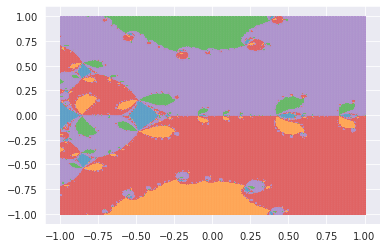

In [98]:
nfrac.fractal([1,-1,1,0,0,1],-1,1,-1,1,500);

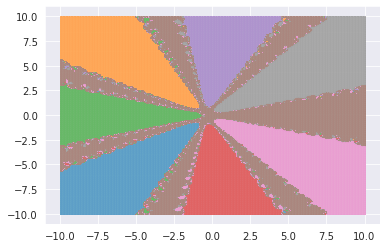

In [96]:
nfrac.fractal([0,1,1,2,4,5,5,3,1],-10,10,-10,10,500);

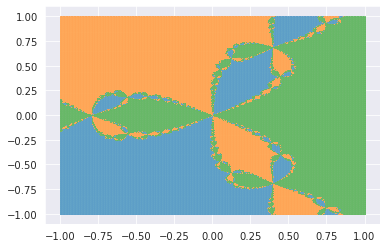

In [99]:
nfrac.fractal([-1,0,0,1],-1,1,-1,1,500);